In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)
     

## Preparando dados

In [ ]:
# carregando dataset do drive
df = pd.read_csv('/content/drive/MyDrive/Material-Alura/dataset.csv', index_col=0)
df.head(3)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [ ]:
print(df.info(), df.isna().sum(), sep='\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

### Encontrando dados faltantes

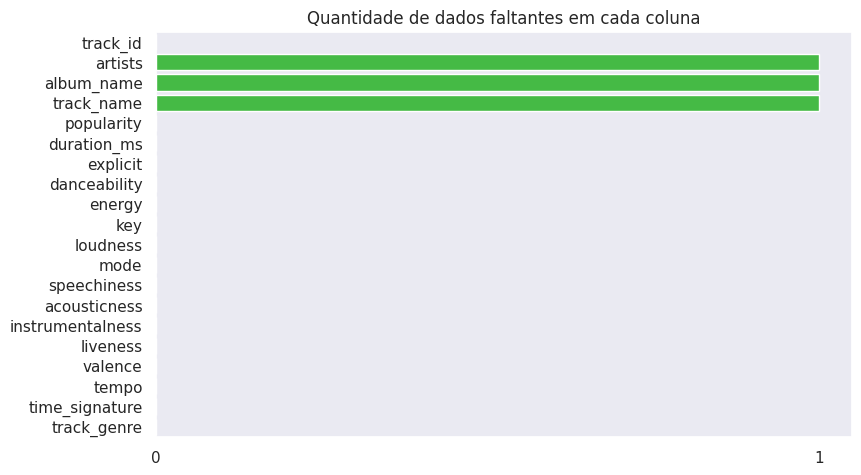

In [ ]:
plt.figure(figsize=(8,5))
data = pd.DataFrame(data = df.isna().sum()).transpose()
sns.barplot(data, orient='h',color='limegreen').set_title('Quantidade de dados faltantes em cada coluna')
plt.xticks(ticks=[0,1])
plt.grid(visible=False)

In [ ]:
df[df['artists'].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [ ]:
# removendo registro com dados faltantes
df = df[df.artists != df['artists'].isna()]

## Análise exploratória

### Tópicos de interesse:
- Quais os artistas mais populares
- Quais são as 100 músicas mais populares
- Quais são os gêneros mais populares
- Quais artistas compuseram mais músicas dentro dos 100 mais populares
- Quantas delas foram feitas sozinhas e quantas são ft (feature)

In [ ]:
# Quais os artistas mais populares (com duplicados)
top_100_artists = df.sort_values('popularity', ascending=False)[['artists', 'popularity']].reset_index(drop=True).head(100)
top_100_artists.shape

(100, 2)

In [ ]:
top_100_distinct = df[['artists', 'track_name', 'popularity', 'duration_ms']]
top_100_distinct = top_100_distinct.drop_duplicates(subset=['artists', 'track_name','duration_ms','popularity'])
top_100_distinct = top_100_distinct.sort_values('popularity', ascending=False)
top_100_distinct.drop('duration_ms', axis=1, inplace=True)
top_100_distinct = top_100_distinct.reset_index(drop='index')
top_100_distinct.head(30)

,artists,track_name,popularity
0,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100
1,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99
2,David Guetta;Bebe Rexha,I'm Good (Blue),98
3,Manuel Turizo,La Bachata,98
4,Bad Bunny,Tití Me Preguntó,97
5,Bad Bunny;Chencho Corleone,Me Porto Bonito,97
6,Chris Brown,Under The Influence,96
7,Bad Bunny,Efecto,96
8,OneRepublic,I Ain't Worried,96
9,Harry Styles,As It Was,95


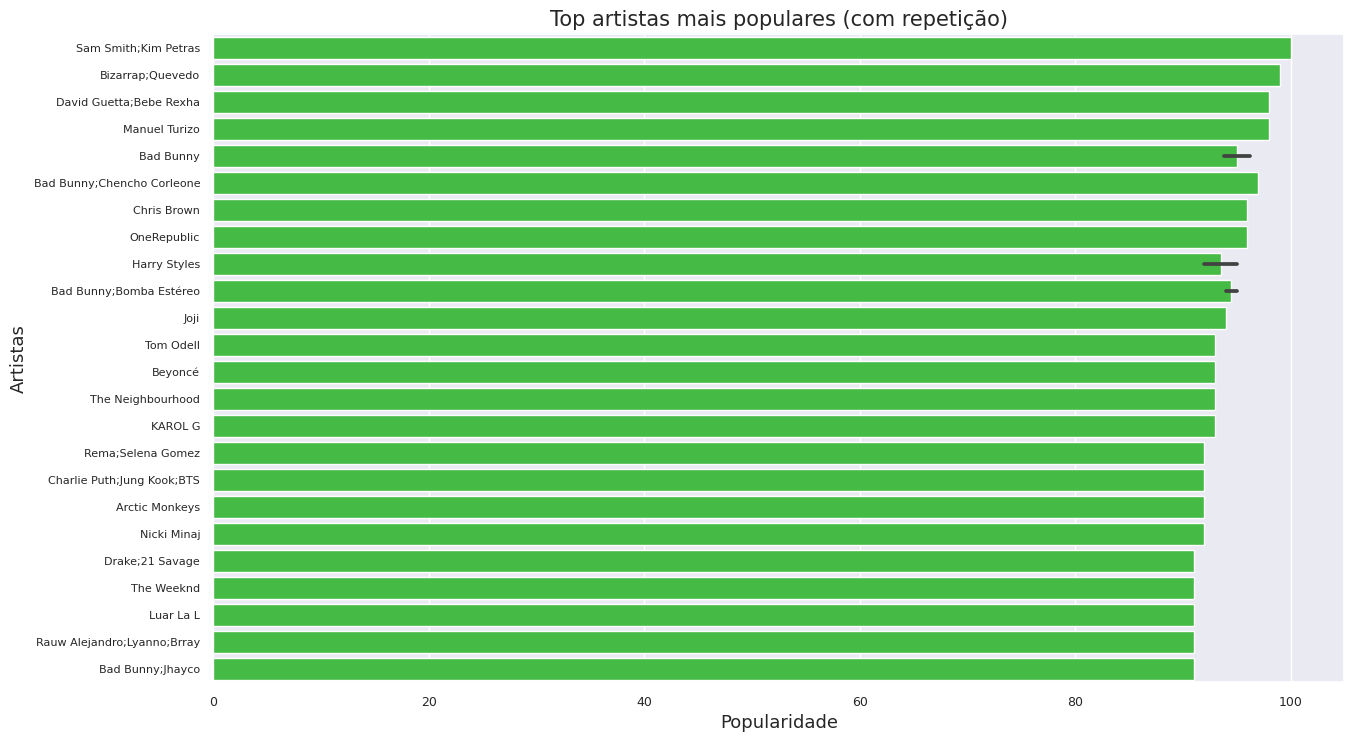

In [ ]:
plt.figure(figsize=(13,8))
bar = sns.barplot(data=top_100_distinct.head(30),y='artists', x='popularity', color='limegreen').set_title('Top artistas mais populares (com repetição)', fontsize=15)
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Popularidade',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

In [ ]:
artists = []
for i in range(0,100):
  lista = top_100_distinct.head(100)['artists'].values[i].split(';')
  for artist in range(0,len(lista)):
    artists.append(lista[artist])

# Frequência dos artistas nos top 100
top_100_count = pd.Series(artists).value_counts()
top_100_count = pd.DataFrame(top_100_count, columns=['frequency'])
top_100_count.reset_index(names='artists', inplace=True)

In [ ]:
top_100_count

,artists,frequency
0,Bad Bunny,13
1,The Weeknd,7
2,Arctic Monkeys,4
3,Ed Sheeran,3
4,Harry Styles,3
...,...,...
92,Ruth B.,1
93,Daft Punk,1
94,Tony Dize,1
95,Beach Weather,1


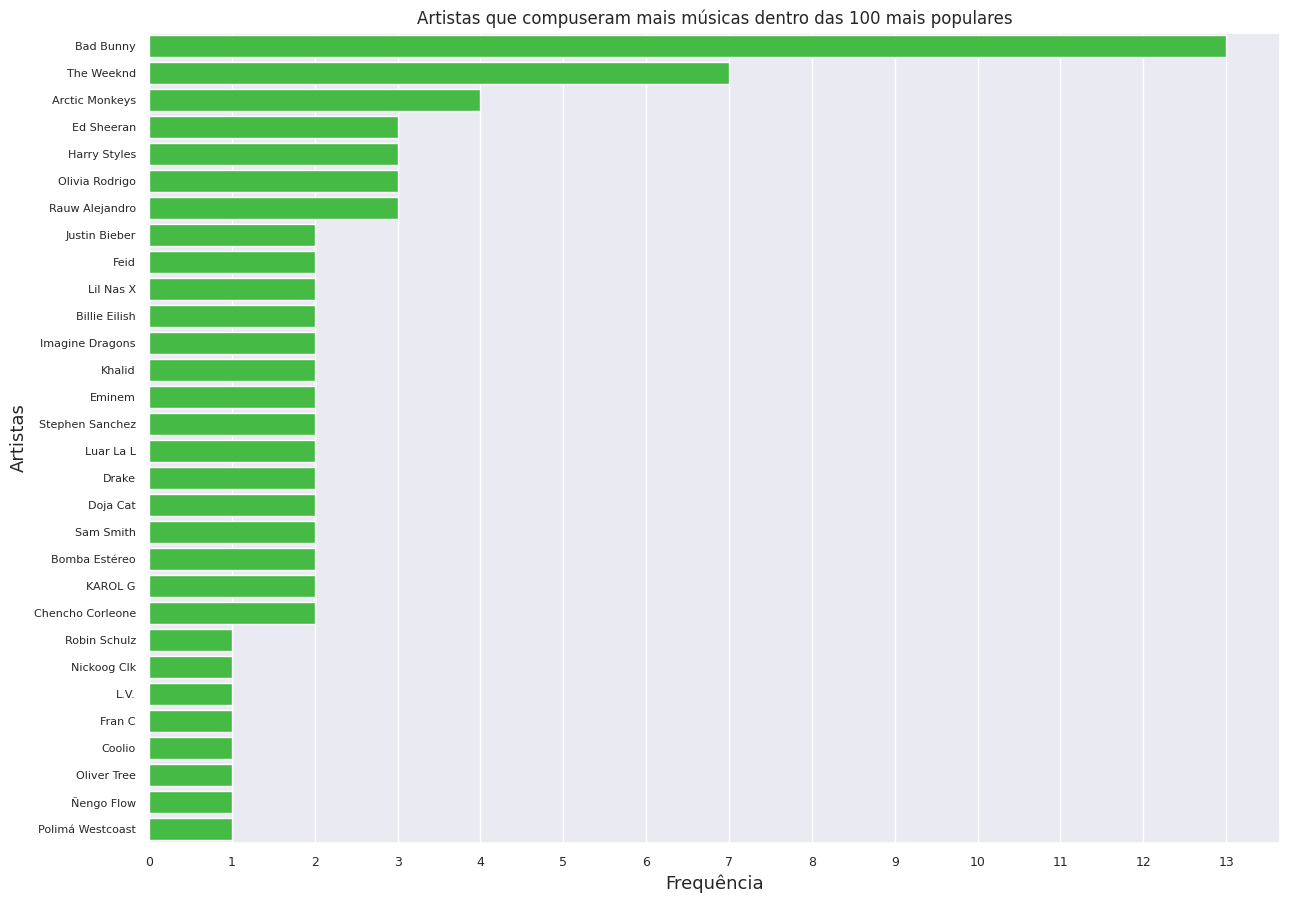

In [ ]:
plt.figure(figsize=(13,10))
bar = sns.barplot(data=top_100_count.head(30), x='frequency', y='artists', orient='h', color='limegreen').set_title('Artistas que compuseram mais músicas dentro das 100 mais populares')
plt.xticks(ticks=range(0,14))
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Frequência',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

In [ ]:
df = df[['track_genre']]
df.head(10)

,track_genre
0,acoustic
1,acoustic
2,acoustic
3,acoustic
4,acoustic
5,acoustic
6,acoustic
7,acoustic
8,acoustic
9,acoustic


In [ ]:
df.value_counts()

track_genre      
acoustic             1000
punk                 1000
progressive-house    1000
power-pop            1000
pop-film             1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Length: 114, dtype: int64

In [ ]:
features = ['track_genre']

for feature in features:
    sns.barplot(data = df,
                x = feature,
                kde = True).set_title(f"Distribuição da variável: {feature}")
    plt.show()

TypeError: ignored

In [ ]:
df.head()

In [ ]:
top_100_count

,artists,frequency
0,Bad Bunny,13
1,The Weeknd,7
2,Arctic Monkeys,4
3,Ed Sheeran,3
4,Harry Styles,3
...,...,...
92,Ruth B.,1
93,Daft Punk,1
94,Tony Dize,1
95,Beach Weather,1
